In [495]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**Import libraries**


In [496]:
#for data analysis
import numpy as np # linear algebra
import pandas as pd # data processing

#for MLA
from sklearn.linear_model import LogisticRegression # 1.logistic regression 
from sklearn.svm import SVC, LinearSVC # 2. SVC, linear SVC
from sklearn.neighbors import KNeighborsClassifier #3.K nearest neighbors
from sklearn.naive_bayes import GaussianNB # 4. Gaussian naive bayes
from sklearn.tree import DecisionTreeClassifier #5. decision tree
from sklearn.ensemble import RandomForestClassifier #6. Random forest

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#data processing
from sklearn.preprocessing import LabelEncoder

#cross validation
from sklearn.model_selection import train_test_split

#evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix

#micro library
import math

**Obtain data:**

In [497]:
data = pd.read_csv("/kaggle/input/titanic/train.csv") # data given 
testval = pd.read_csv("/kaggle/input/titanic/test.csv") # data for final test
data_clean = [data, testval]

**Data Analysis:**

Columns in given dataset 

In [498]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Interpretation-

**Categorical** - Survived, Pclass, sex, Embarked

**Numerical** - Continuous - age, fare; Discrete - SibSp , 	Parch, PassengerID

**Alphabetical** -Name, sex, Embarked 

**Alphanumerical**- Cabin, Ticket

In [499]:
print(data.isnull().sum())
print('*'*50)
print(testval.isnull().sum())
print('*'*50)
data.describe(include = 'all')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
**************************************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sagesser, Mlle. Emma",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [500]:
testval.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Miles, Mr. Frank",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Interpretation-

**Data cleaning**

1. some value in Age, Cabin ,Fare, Embarked is missing.PassengerId, Ticket does not seem relevant to survivance
2. Cabin has a huge data absence, we can drop this column.Tickect
3. missing Embarked can be replaced by S , most frequently appeared
4. missing Age and Fare can be replaced by the mean in the column
5. Name can be dropped but title can be used

In [501]:
col_drop = ["Cabin", "Ticket"] 
for df in data_clean:
    df.drop(col_drop, inplace = True, axis = 1)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
    df["Age"].fillna(df["Age"].median(), inplace = True)
    df["Fare"].fillna(df["Fare"].median(), inplace = True)

In [502]:
print(data.isnull().sum())
print('*'*50)
print(testval.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
**************************************************
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


**Analyze discrete data by features**

numerical(discrete) and categorical datas can have effect on surviving.

In [503]:
col_analyze = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for analyze in col_analyze:
    print("Data analyze of", analyze, "vs", 'Survived')
    print(data[[analyze, "Survived"]].groupby([analyze], as_index = False).mean().sort_values(by = "Survived", ascending = False))
    print('*'*50)

Data analyze of Pclass vs Survived
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
**************************************************
Data analyze of Sex vs Survived
      Sex  Survived
0  female  0.742038
1    male  0.188908
**************************************************
Data analyze of SibSp vs Survived
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
**************************************************
Data analyze of Parch vs Survived
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
**************************************************
Data analyze of Embarked vs Survived
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
**************************************************


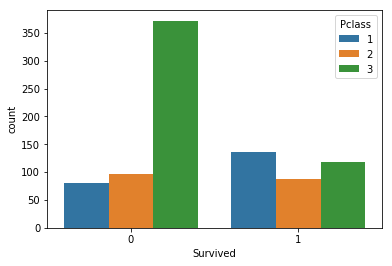

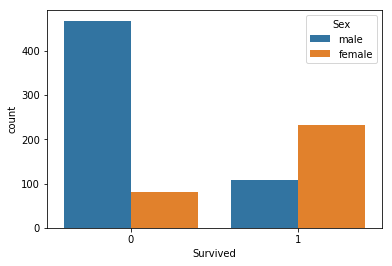

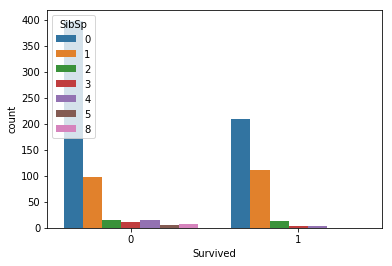

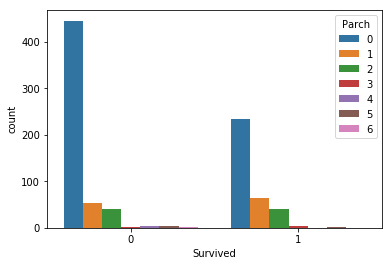

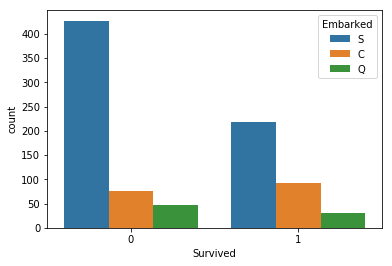

In [504]:
col_analyze = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for analyze in col_analyze:
    plt.figure()
    sns.countplot(x = "Survived", hue = analyze, data = data)

Interpretation:

* Pclass=3 had most passengers, however most did not survive.
* Most of the male and S embarked died.
* Correlation between "Pclass", "Sex",and  "Embarked" is high while for "SibSp", "Parch", its not. But they can be used to create new feature of family size or if the person was travelling alone or not.

**Analyze continuous data by visualization**

Age and fare can be analyzed by plotting graph against survived.

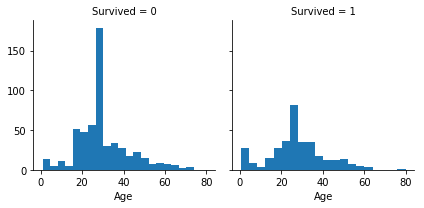

In [505]:
g = sns.FacetGrid(data = data, col = "Survived")
g = g.map(plt.hist, "Age", bins = 20)

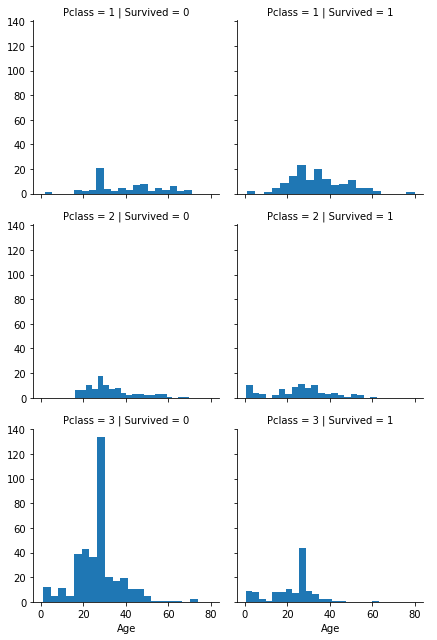

In [506]:
g = sns.FacetGrid(data = data, row = "Pclass", col = "Survived")
g = g.map(plt.hist, "Age", bins = 20)
g.add_legend()

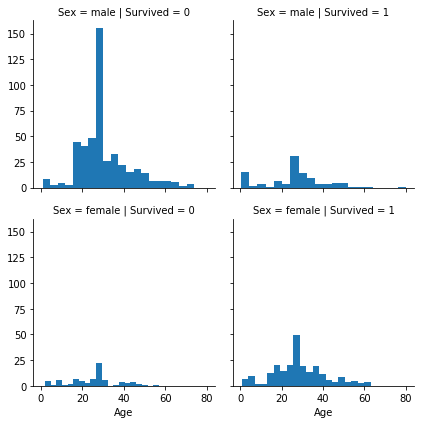

In [507]:
g = sns.FacetGrid(data = data, row = "Sex", col = "Survived")
g = g.map(plt.hist, "Age", bins = 20)

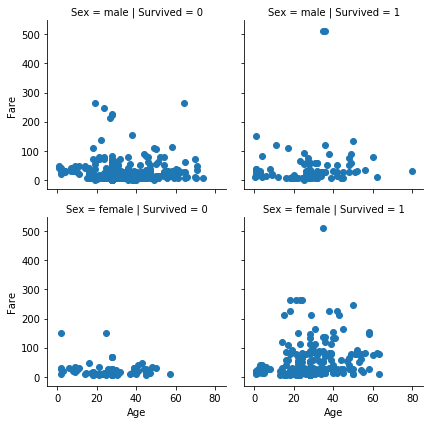

In [508]:
g = sns.FacetGrid(data = data, row = "Sex", col = "Survived")
g = g.map(plt.scatter,"Age", "Fare")
g.add_legend()

Interpretation:

1. Age is  distributed over 0 to 80, people above 80 have all survived 
2. Mostly young people died, but in pclass = 1, some survived
3. children expect pclass = 3 have higher surviving rate.
4. Mostly young male died, but some male children survived
5. For fare >= 500 , people survived

Age and fare can be replaced by agebin

**Creating new data Feature** - 

* Title - first word in the name ,
* Agebin - Age distributed on 20 years gaps, 
* Farebin - Fare distributed on 5 equal gaps 
* FamilySize - total family size boarded the ship

In [509]:
#Agebin and Farebin

for df in data_clean:
    df["Agebin"] = pd.cut(df["Age"], 5)
    df["Farebin"] = pd.cut(df["Fare"], 5)

#visualization
col_analyze = ["Agebin", "Farebin"]
for analyze in col_analyze:
    print(data[[analyze, "Survived"]].groupby(analyze, as_index = False).mean().sort_values(by = "Survived", ascending = False))
    print("*"*50)

             Agebin  Survived
0    (0.34, 16.336]  0.550000
3  (48.168, 64.084]  0.434783
2  (32.252, 48.168]  0.404255
1  (16.336, 32.252]  0.344168
4    (64.084, 80.0]  0.090909
**************************************************
              Farebin  Survived
4  (409.863, 512.329]  1.000000
1  (102.466, 204.932]  0.757576
2  (204.932, 307.398]  0.647059
0   (-0.512, 102.466]  0.361575
3  (307.398, 409.863]       NaN
**************************************************


In [510]:
#title
for df in data_clean:
    df["Title"] = df.Name.str.extract(" ([A-Za-z]+)\.", expand = False)
    print(df["Title"].value_counts())
    print("*"*50)

pd.crosstab(data["Title"], data["Sex"])

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Mme           1
Ms            1
Don           1
Capt          1
Sir           1
Countess      1
Lady          1
Name: Title, dtype: int64
**************************************************
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64
**************************************************


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Observation:

1. Some of the titles have rarely used, we can name them Extra, 
2. Ms,Mlle,lady are female title replaced as Miss and Mme, Dona as Mrs(married) 

In [511]:
for dataset in data_clean:
    dataset['Title'] = dataset['Title'].replace(['Lady', "Ms", 'Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Dona'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Countess','Capt', 'Col',
                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Extra')
    print(dataset["Title"].value_counts())
    print("*"*50)
print(data[["Title","Survived"]].groupby(["Title"], as_index = False).mean().sort_values(by = "Survived", ascending = False))

Mr        517
Miss      186
Mrs       126
Master     40
Extra      22
Name: Title, dtype: int64
**************************************************
Mr        240
Miss       79
Mrs        73
Master     21
Extra       5
Name: Title, dtype: int64
**************************************************
    Title  Survived
4     Mrs  0.793651
2    Miss  0.704301
1  Master  0.575000
0   Extra  0.318182
3      Mr  0.156673


Interpretation : Married women and Master titled Male have greater chances of survival of unmarried women and Mr. 

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


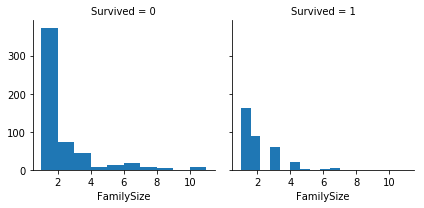

In [512]:
#family size
for df in data_clean:
    df["FamilySize"] = df["Parch"] + df["SibSp"] + 1
print(data[["FamilySize","Survived"]].groupby(["FamilySize"], as_index = False).mean().sort_values(by = "Survived", ascending = False))
g = sns.FacetGrid(data =data, col = "Survived")
g = g.map(plt.hist, "FamilySize")

Interpretation: Small and midium families have greater survival rate than large family or loner(1)

**Handling categorical data:**

Sex, Embarked ,Title, Agebin and Farebin

In [513]:
category = ["Sex", "Title", "Embarked" ,"Agebin", "Farebin"]
for df in data_clean:
    for c in category:
        encoder = LabelEncoder()
        df[c] = encoder.fit_transform(df[c])
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Agebin,Farebin,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,1,0,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,4,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,4,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2,0,3,1


**Deleting useless features**

Age, Fare, SibSp, Parch, Name can be dropped.PassengerId is also useless, will be dropped in data dataframe only

In [514]:
useless = ["SibSp", "Parch", "Name" ,"Age", "Fare"]
for df in data_clean:
    df.drop(useless, axis = 1, inplace = True)
data.drop("PassengerId", axis = 1, inplace = True)
data.head(5)

,Survived,Pclass,Sex,Embarked,Agebin,Farebin,Title,FamilySize
0,0,3,1,2,1,0,3,2
1,1,1,0,0,2,0,4,2
2,1,3,0,2,1,0,2,1
3,1,1,0,2,2,0,4,2
4,0,3,1,2,2,0,3,1


**Model Selection:**

1. Logistic regression 
2. SVC, linear SVC
3. K nearest neighbors
4. Gaussian naive bayes
5. Decision tree
6. Random forest

In [515]:
#split data in 80% train 20% test data
x_train, x_test, y_train, y_test = train_test_split(data.drop("Survived", axis = 1), data["Survived"], test_size = 0.20)
print(x_train.shape)
print(x_test.shape)

(712, 7)
(179, 7)


In [516]:
model = [LogisticRegression(), SVC(), LinearSVC(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()]
for m in model:
    clf = m
    clf.fit(x_train, y_train)
    print(clf.score(x_train, y_train))

0.8019662921348315
0.848314606741573
0.7963483146067416
0.8441011235955056
0.7949438202247191
0.8721910112359551
0.8721910112359551


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Interpretation:DecisionTreeClassifier(), RandomForestClassifier() have higher accuracy.So we choose RandomForestClassifier() as our final model

In [517]:
final_model = RandomForestClassifier(n_estimators = 200)
final_model.fit(x_train, y_train)
print(final_model.score(x_train, y_train))
print(confusion_matrix(y_test, final_model.predict(x_test)))
survived = final_model.predict(testval.drop("PassengerId", axis = 1))
print(survived)

0.8721910112359551
[[102  14]
 [ 22  41]]
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [519]:
#output

submission = pd.DataFrame(
{
    "PassengerId" : testval["PassengerId"],
    "Survived" : survived
}
)
#submission.head()
submission.to_csv("submission.csv", index = False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
